# **IDENTIFYING CUSTOMER SEGMENTS**

---



---







In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from numpy import math


df = pd.read_csv("/content/sample_data/Wholesale customers data.csv")
df.head()



,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


**Add new column "Total" having sum of all products**

---



In [ ]:
df['Total'] = df['Fresh'] + df['Milk'] + df['Grocery'] + df['Frozen'] + df['Detergents_Paper'] + df['Delicassen']
print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Total  
0        1338  34112  
1        1776  33266  
2        7844  36610  
3        1788  27381  
4        5185  46100  


**Shape of dataset**

---



In [ ]:
df.shape

(440, 9)

In [ ]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 440
Number of Columns 9


**Dataset information**

---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
 8   Total             440 non-null    int64
dtypes: int64(9)
memory usage: 31.1 KB


**Check Null Values In The Dataset**



---





In [ ]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
Total               0
dtype: int64

**Overall Statistics of Dataset**

---



In [ ]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000


# K-means Clustering on Milk VS Total

---



---



In [ ]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen', 'Total'],
      dtype='object')

In [ ]:
X = df[['Milk','Total']]
X.head()

,Milk,Total
0,9656,34112
1,9810,33266
2,8808,36610
3,1196,27381
4,5410,46100


**Train the data using K-means**

---



In [ ]:
k_means = KMeans()
k_means.fit(X)

KMeans()

**Assign clusters to each datapoints**

---



In [ ]:
k_means = KMeans(n_clusters=3)
k_means.fit_predict(X)

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 1, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0,
       2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0,
       2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

**Elbow Method To Find Optimal Number of Clusters**

---



In [ ]:
wcss=[]
for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

wcss

[328865702963.7068,
 153477609208.2809,
 70665118328.13797,
 43827717339.884865,
 28201558853.458244,
 21278352094.650948,
 17415154958.69401,
 15554870493.365257,
 13659744092.997261,
 12208188518.354145]

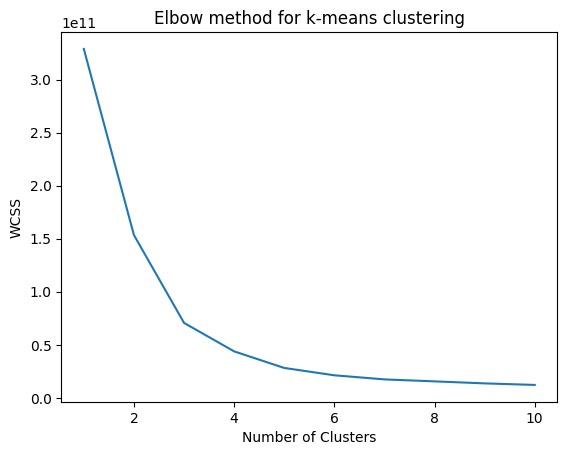

In [ ]:
plt.plot(range(1,11),wcss)
plt.title("Elbow method for k-means clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

**Model Training**

---



In [ ]:
X = df[['Milk','Total']]
k_means = KMeans(n_clusters=3,random_state=42)
y_means = k_means.fit_predict(X)
y_means

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2,
       1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2,
       1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

**Visual representation of customer segmentation**

---



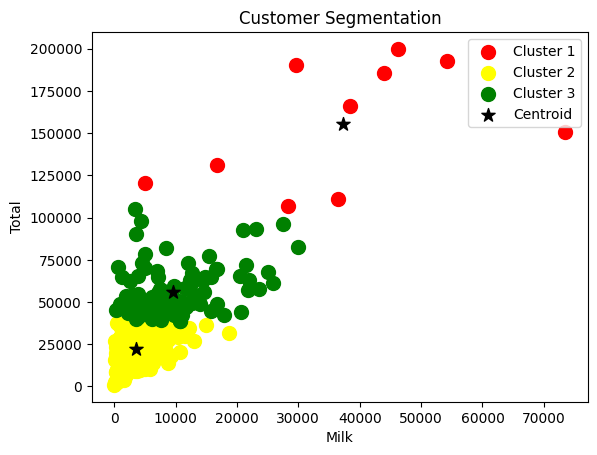

In [ ]:
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1],s=100,c='red',label="Cluster 1")
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1],s=100,c='yellow',label="Cluster 2")
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1],s=100,c='green',label="Cluster 3")
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,c="black",label="Centroid",marker="*")
plt.title("Customer Segmentation")
plt.xlabel("Milk")
plt.ylabel("Total")
plt.legend()
plt.show()

**Predict new data points**

---



In [ ]:
k_means.predict([[50000,200000]])

array([0], dtype=int32)

In [ ]:
k_means.predict([[5000,25000]])

array([1], dtype=int32)

# K-means on Fresh VS Total



---



---




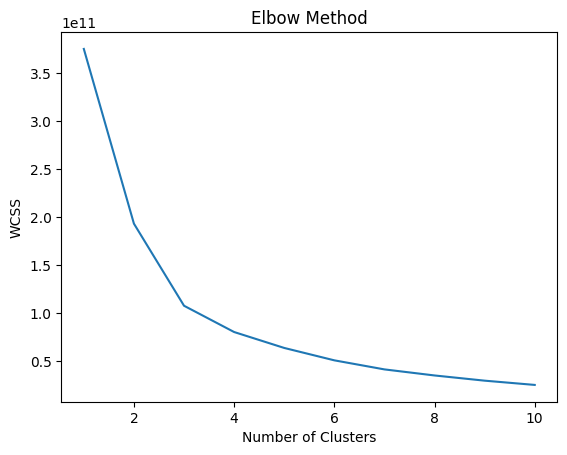

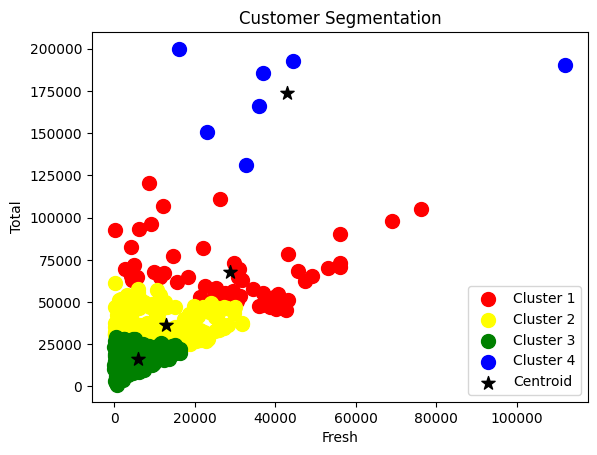

In [ ]:
X = df[['Fresh','Total']]
X.head()
k_means = KMeans()
k_means.fit(X)
k_means = KMeans(n_clusters=4)
k_means.fit_predict(X)
wcss=[]
for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

wcss
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()
X = df[['Fresh','Total']]
k_means = KMeans(n_clusters=4,random_state=42)
y_means = k_means.fit_predict(X)
y_means
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1],s=100,c='red',label="Cluster 1")
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1],s=100,c='yellow',label="Cluster 2")
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1],s=100,c='green',label="Cluster 3")
plt.scatter(X.iloc[y_means==3,0],X.iloc[y_means==3,1],s=100,c='blue',label="Cluster 4")
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,c="black",label="Centroid",marker="*")
plt.title("Customer Segmentation")
plt.xlabel("Fresh")
plt.ylabel("Total")
plt.legend()
plt.show()

# K-means on Grocery VS Total

---



---



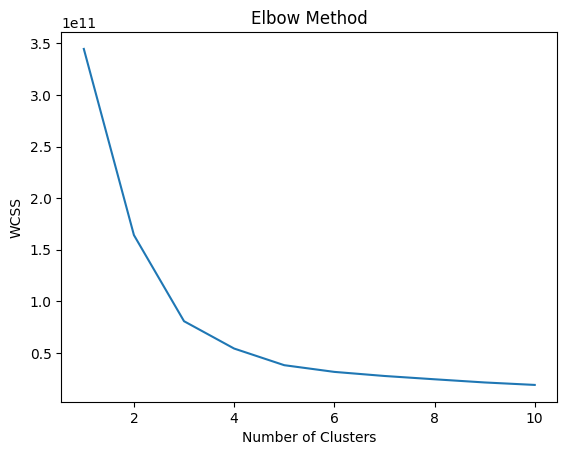

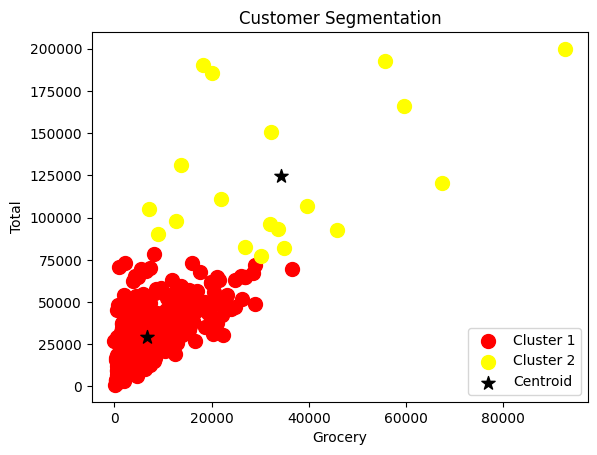

In [ ]:
X = df[['Grocery','Total']]
X.head()
k_means = KMeans()
k_means.fit(X)
k_means = KMeans(n_clusters=2)
k_means.fit_predict(X)
wcss=[]
for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

wcss
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()
X = df[['Grocery','Total']]
k_means = KMeans(n_clusters=2,random_state=42)
y_means = k_means.fit_predict(X)
y_means
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1],s=100,c='red',label="Cluster 1")
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1],s=100,c='yellow',label="Cluster 2")
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,c="black",label="Centroid",marker="*")
plt.title("Customer Segmentation")
plt.xlabel("Grocery")
plt.ylabel("Total")
plt.legend()
plt.show()

---
---

# ****Analysis****

---



---



# **Analysis of Milk VS Total Graph**


---


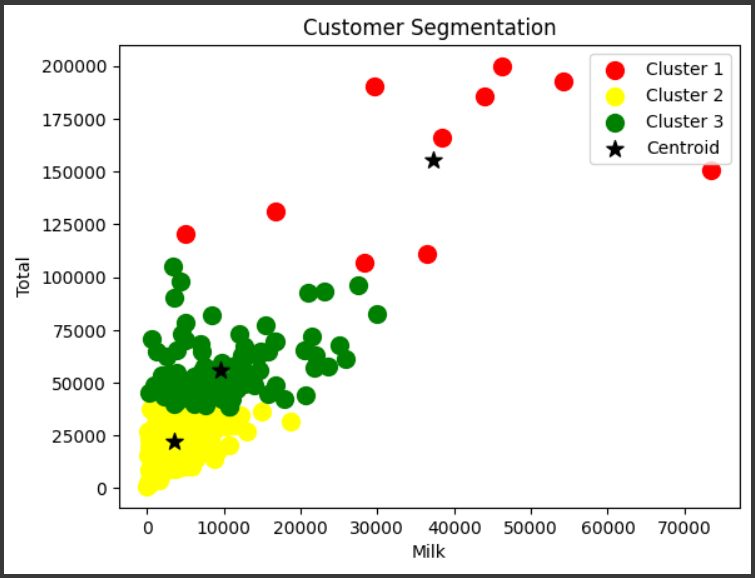

---

**The graph shows the number of customers by cluster, with three clusters labeled Cluster 1, Cluster 2, and Cluster 3.**

*   Cluster 1 is the largest cluster, with over 175,000 total money spending customers. It is also the cluster with the highest centroid, which means that the customers in this cluster have the highest average spending.

*   Cluster 2 is the second largest cluster, with over 150,000 total money spending customers. Its centroid is slightly lower than Cluster 1, but still significantly higher than Cluster 3.

*   Cluster 3 is the smallest cluster, with under 125,000 total money spending customers. It also has the lowest centroid, which means that the customers in this cluster have the lowest average spending.


---

### **Pattern of the Graph**

The pattern of the graph is a right **skewed distribution**, with a long tail on the right side. This means that there are a few customers who spend a lot of money, and a large number of customers who spend less money.

---

### **Based on this graph, we can identify three customer segments:**

*   High-value customers: These customers are in Cluster 1 and have the
highest average spending. They are likely to be your most profitable customers.
*   Medium-value customers: These customers are in Cluster 2 and have an average spending that is slightly lower than Cluster 1. They are still profitable customers, but they may require more marketing and sales effort to retain.
*   Low-value customers: These customers are in Cluster 3 and have the lowest average spending. They may not be as profitable as the other two segments, but they are still important to your business.


---


###**Recommendations**

**Based on this analysis, here are some recommendations for how to target each customer segment:**

* High-value customers: These customers should be your top priority. You should focus on retaining them and increasing their spending. You can do this by offering them exclusive discounts and promotions, or by providing them with personalized customer service.
* Medium-value customers: You should also focus on retaining these customers, but you may need to offer them more incentives to do so. For example, you could offer them a free shipping offer or a discount on their next purchase.
* Low-value customers: These customers may not be as profitable as the other two segments, but they are still important to your business. You should focus on acquiring new low-value customers and converting them into medium-value or high-value customers. You can do this by offering them introductory discounts or by targeting them with relevant marketing campaigns.

**By understanding your customer segments and their needs, you can develop more effective marketing and sales strategies.**

---



# **Analysis of Fresh VS Total Graph**

---
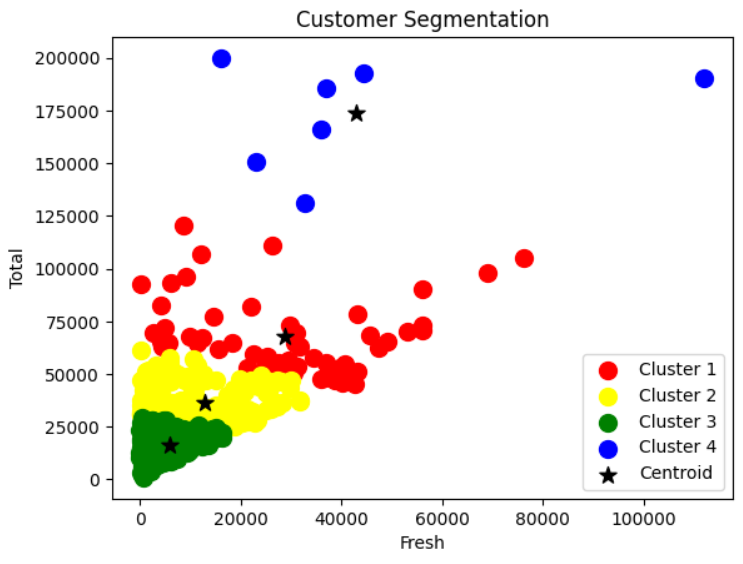

---
###**Pattern of the Graph**
The pattern of the graph is similar to the previous one, with a right skewed distribution and a long tail on the right side. This means that there are a few customers who spend a lot of money, and a large number of customers who spend less money.

---
###**Difference between the [Milk Vs Total] and [Fresh VS Total]**
However, there are a few key differences between the two graphs.
* First, the graph you sent me has four clusters instead of three.
* Second, the centroids of the clusters are more evenly distributed.
* This means that there is less difference in the average spending of customers between the different clusters.

This suggests that the customer segments in the graph are **more heterogeneous** than the customer segments in the previous graph. This means that there is **more variation** in the needs and preferences of customers within each cluster.

---

###**This pattern has several implications for businesses:**

It is important to segment your customers more granularly. This will allow you to target your marketing and sales efforts more effectively.
You need to understand the needs and preferences of each customer segment. This will help you to develop more relevant products and services.
You need to be flexible and adaptable in your marketing and sales strategies. This will allow you to respond to the changing needs of your customers.

---

#**Analysis of Grocery VS Total Graph**

---

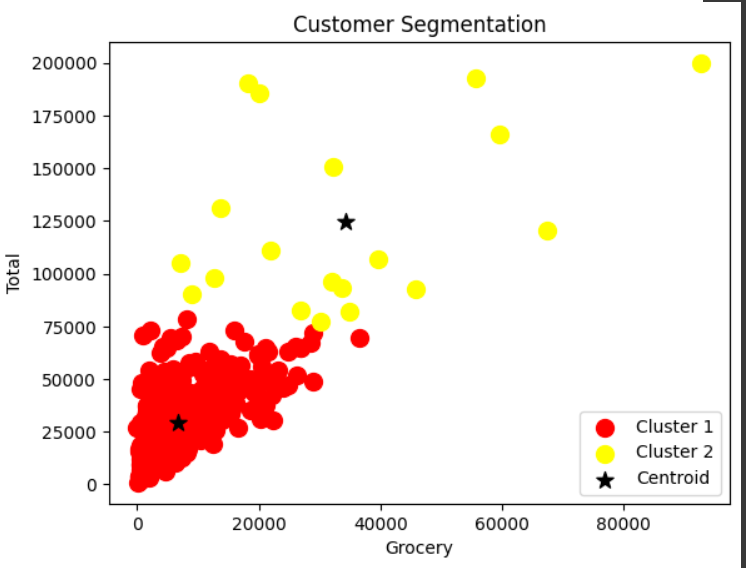
---
###**Pattern of the Graph**

The pattern of the graph is different from the previous two graphs.
* This graph has **two clusters**, and the centroids of the clusters are very different.
* This means that there is a large difference in the average spending of customers between the two clusters.

This suggests that the customer segments in the graph are more polarized than the customer segments in the previous graphs. This means that there are two distinct groups of customers, with very different needs and preferences.

---

###**This pattern has several implications for businesses:**

You need to focus on your two distinct customer segments. Develop marketing and sales strategies that are tailored to the specific needs of each segment.
You need to be careful not to alienate your low-value customers. Even though they may not be as profitable as your high-value customers, they still contribute to your overall revenue. You need to make sure that you are still offering them value.
You need to be aware of the potential for customer churn. If you are not meeting the needs of your high-value customers, they may be more likely to switch to a competitor.

---

# Customers Segments

---



---



In [ ]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen', 'Total'],
      dtype='object')

In [ ]:

cluster_means = df.groupby(y_means).mean()
print(cluster_means)


    Channel    Region         Fresh          Milk       Grocery        Frozen  \
0  1.306413  2.536817  11103.453682   4848.522565   6759.092637   2750.748219   
1  1.684211  2.684211  31872.473684  26796.263158  34367.578947  10188.684211   

   Detergents_Paper   Delicassen          Total  
0       2322.726841  1308.244656   29092.788599  
1      15262.578947  6324.842105  124812.421053  


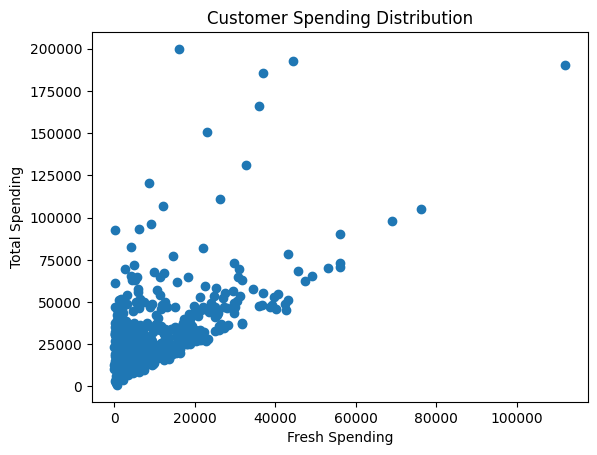

In [ ]:
# Create a scatter plot of the Fresh and total spending for each customer
plt.scatter(df['Fresh'], df['Total'])

# Add labels and title to the plot
plt.xlabel('Fresh Spending')
plt.ylabel('Total Spending')
plt.title('Customer Spending Distribution')

# Show the plot
plt.show()


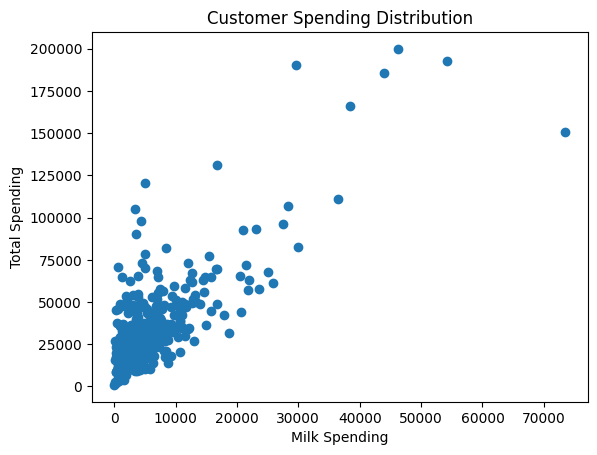

In [ ]:
# Create a scatter plot of the Milk and total spending for each customer
plt.scatter(df['Milk'], df['Total'])

# Add labels and title to the plot
plt.xlabel('Milk Spending')
plt.ylabel('Total Spending')
plt.title('Customer Spending Distribution')

# Show the plot
plt.show()

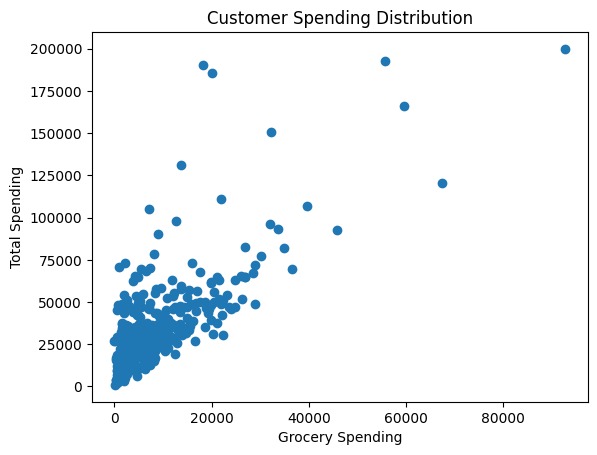

In [ ]:
# Create a scatter plot of the grocery and total spending for each customer
plt.scatter(df['Grocery'], df['Total'])

# Add labels and title to the plot
plt.xlabel('Grocery Spending')
plt.ylabel('Total Spending')
plt.title('Customer Spending Distribution')

# Show the plot
plt.show()

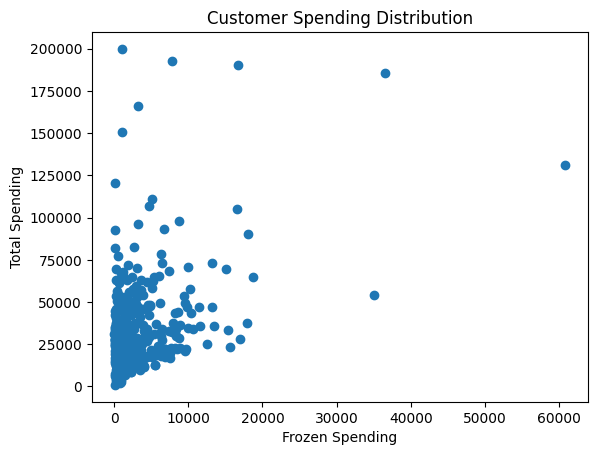

In [ ]:
# Create a scatter plot of the Frozen and total spending for each customer
plt.scatter(df['Frozen'], df['Total'])

# Add labels and title to the plot
plt.xlabel('Frozen Spending')
plt.ylabel('Total Spending')
plt.title('Customer Spending Distribution')

# Show the plot
plt.show()

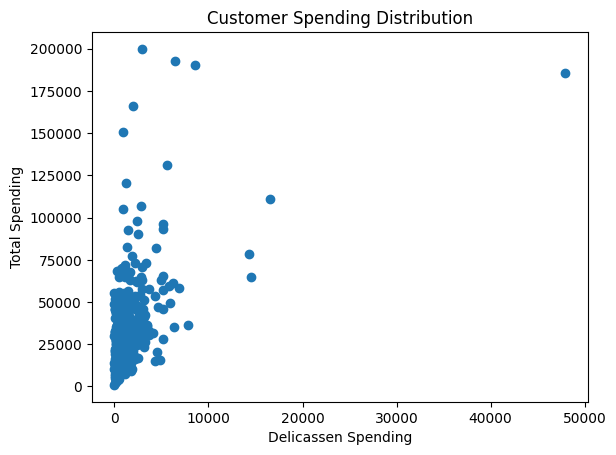

In [ ]:
# Create a scatter plot of the Delicassen and total spending for each customer
plt.scatter(df['Delicassen'], df['Total'])

# Add labels and title to the plot
plt.xlabel('Delicassen Spending')
plt.ylabel('Total Spending')
plt.title('Customer Spending Distribution')

# Show the plot
plt.show()

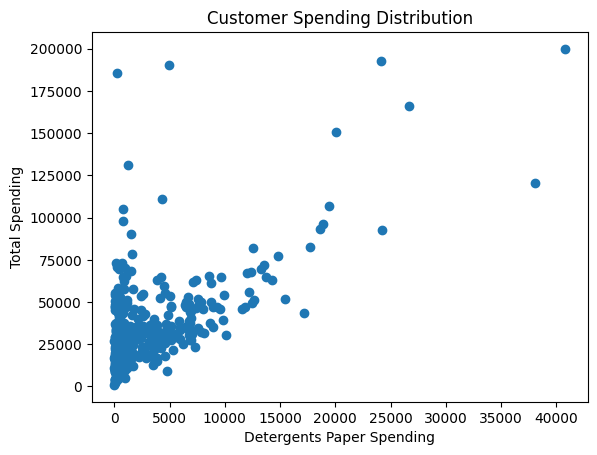

In [ ]:
# Create a scatter plot of the Detergents_Paper and total spending for each customer
plt.scatter(df['Detergents_Paper'], df['Total'])

# Add labels and title to the plot
plt.xlabel('Detergents Paper Spending')
plt.ylabel('Total Spending')
plt.title('Customer Spending Distribution')

# Show the plot
plt.show()

#**Analysis on Customers Segment**
---
Customer spending distribution is typically **right-skewed**, meaning that there are a few customers who spend a lot of money, and a large number of customers who spend less money. This is known as the Pareto principle, or the 80/20 rule, because it shows that typically 80% of the revenue comes from 20% of the customers.

---

**There are several implications of this pattern for businesses:**

*  Focus on your high-value customers. These customers are the ones who are generating the most revenue for your business. It is important to focus on retaining them and increasing their spending.

* Don't ignore your low-value customers. While they may not be as profitable as the high-value customers, they still contribute to your overall revenue. You should focus on acquiring new low-value customers and converting them into medium-value or high-value customers.

* Segment your customers granularly. This will allow you to target your marketing and sales efforts more effectively.

* Understand the needs and preferences of each customer segment. This will help you to develop more relevant products and services.

* Be flexible and adaptable in your marketing and sales strategies. This will allow you to respond to the changing needs of your customers.

---